In [7]:
from scripts.api.DampersProcessor import DampersProcessor
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [8]:
dp = DampersProcessor()
dp.get_auth_token()  # 获取用户token

## 设定阀门的角度

In [14]:
new_damper_config = [{'id': '1087931244903137285', 'angle': 1.0, 'damper_name': ''},
                     {'id': '1087931244907331584', 'angle': 2.0, 'damper_name': ''},
                     {'id': '1087931244907331585', 'angle': 3.0, 'damper_name': ''},
                     {'id': '1087931244907331586', 'angle': 4.0, 'damper_name': ''},
                     {'id': '1087931244907331587', 'angle': 5.0, 'damper_name': ''},
                     {'id': '1087931244907331588', 'angle': 6.0, 'damper_name': ''},
                     {'id': '1087931244907331589', 'angle': 7.0, 'damper_name': ''},
                     {'id': '1087931244907331591', 'angle': 9.0, 'damper_name': ''},
                     {'id': '1087931244907331592', 'angle': 10.0, 'damper_name': ''}]

In [16]:
dp.set_dampers(new_damper_config)  # 设置阀门角度
dp.update_impedance(dp.preset["requestSupplySystemId"])  # 更新阻抗
result = dp.calculation_sync()  # 计算
now_time = datetime.datetime.now().strftime('%Y%m%dT%H%M%S')  # 获取当前时间
json.dump(result, open(f"result_{now_time}.json", "w"))  # 保存结果

In [19]:
real_pressures = result["roomNameToRealPressure"]  # 实际压力
design_pressures = result["roomNameToDesignPressure"]  # 设计压力
real_supply_volumes = result["roomNameToSupplyWindVolume"]  # 实际送风量
design_supply_volumes = {'二更': 887,
                         '测试间三': 91,
                         '洁净走廊': 1224,
                         '外走道': 0.0,
                         '测试间一': 92,
                         '一更': 1477,
                         '测试间二': 91}  # 设计送风量
real_remain_volumes = result["roomNameToRemainWindVolume"]  # 实际渗风量

## 画图

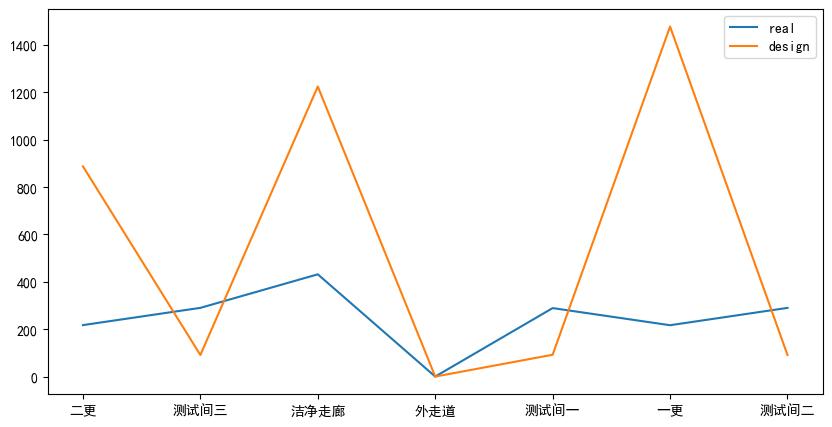

In [21]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
# 绘制折线图，分别用不同颜色
plt.plot(real_supply_volumes.keys(), real_supply_volumes.values(), label="real")
plt.plot(design_supply_volumes.keys(), design_supply_volumes.values(), label="design")
plt.legend()
plt.show()